In [1]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
from nodes.HR import HR
from nodes.HH import HH
from utils.statistics import cal_cv
from utils.utils import spikevent

In [2]:
N = 2
method = "euler"  # "rk4", "euler"
models = HH(N=N, method=method, dt=0.01)
models.Iex = 0.
# models = HR(N=N, method=method, dt=0.01)
# models.Iex = 3.   # 混沌态
time = []
mem = []
se = spikevent(N)
cv = cal_cv(N, th_up=models.th_up, th_down=models.th_down)

for i in range(10000):
    models()

for i in range(100000):
    # 使用泊松过程测试CV
    if np.random.rand()<0.05: 
        models.Iex=100 
    else:
        models.Iex=0 

    models()
    cv(models.t, models.mem)
    time.append(models.t)
    mem.append(models.mem.copy())
    se(models.t, models.flaglaunch)


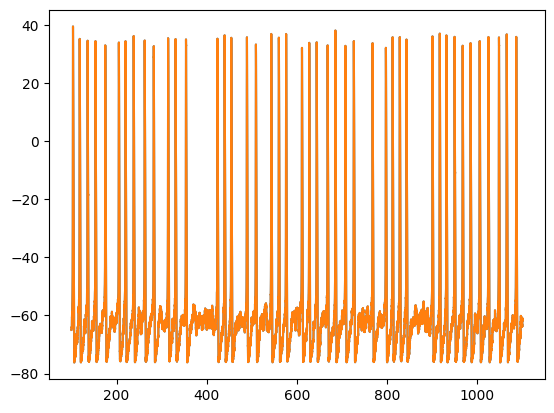

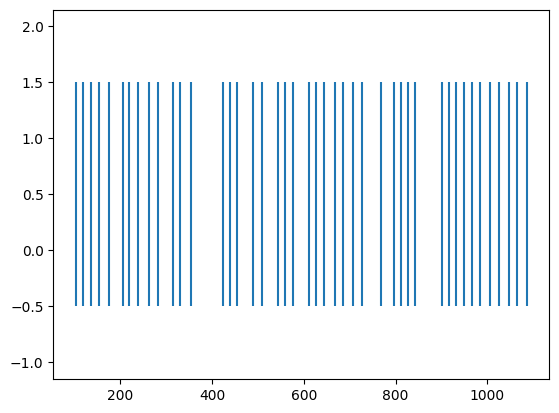

In [3]:
plt.plot(time, mem)
# plt.xlim(200,250)
plt.figure()
se.pltspikes()
# plt.xlim(200,250)
# print(se.Tspike_list)

plt.show()

In [4]:
# print(cal_cv.sum, cal_cv.sum2)
cv.return_cv()
# aver = cv.sum/(cv.nn-2)
# (cv.sum2/(cv.nn-2)-aver*aver)**(1/2)/aver 

(array([0.51934953, 0.51934953]), 0.5193495307203265)